In [80]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows',1000)

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [81]:
# Reading the train and test dataset

df_train = pd.read_csv('E:\Credit Card Fraud Detection Project\Train Data.csv')
df_test = pd.read_csv('E:\Credit Card Fraud Detection Project\Test Data.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [82]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [85]:
# Dropping Unnamed column

df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [86]:
# Converting date columns to datetime format

df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

In [87]:
df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

In [88]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [91]:
# Dropping fields not necessary for model building

drop_columns = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']

df_train_first = df_train.drop(drop_columns,axis=1)
df_test_first = df_test.drop(drop_columns,axis=1)

df_train_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [92]:
# Checking Class Imbalance

class_train=df_train_first['is_fraud'].value_counts()
normal_train=class_train[0]/df_train_first['is_fraud'].count()*100
fraud_train=class_train[1]/df_train_first['is_fraud'].count()*100

class_test=df_test_first['is_fraud'].value_counts()
normal_test=class_test[0]/df_test_first['is_fraud'].count()*100
fraud_test=class_test[1]/df_test_first['is_fraud'].count()*100


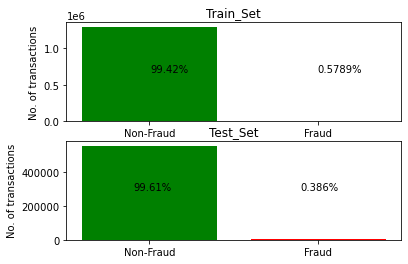

In [93]:
plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], class_train, color=['g','r'])
plt.title('Train_Set')
plt.ylabel('No. of transactions')
plt.annotate("{0:.4}%".format(normal_train),(0.25, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_train),(0.75, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], class_test, color=['g','r'])
plt.title('Test_Set')
plt.ylabel('No. of transactions')
plt.annotate("{0:.4}%".format(normal_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [94]:
# Creating field for age on transaction date

df_train_first['transaction_age'] = df_train_first['trans_date'] - df_train_first['dob']
df_train_first['transaction_age'] = df_train_first['transaction_age'].astype('timedelta64[Y]')

df_test_first['transaction_age'] = df_test_first['trans_date'] - df_test_first['dob']
df_test_first['transaction_age'] = df_test_first['transaction_age'].astype('timedelta64[Y]')

df_train_first.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,transaction_age
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [95]:
df_train_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [96]:
df_test_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [97]:
city_is_fraud = pd.DataFrame(df_train_first.groupby('city')['is_fraud'].sum())
city_is_fraud = city_is_fraud[city_is_fraud['is_fraud']>0]
city_is_fraud.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [98]:
state_is_fraud = pd.DataFrame(df_train_first.groupby('state')['is_fraud'].sum())
state_is_fraud = state_is_fraud[state_is_fraud['is_fraud']>0]
state_is_fraud.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [99]:
job_fraud = pd.DataFrame(df_train_first.groupby('job')['is_fraud'].sum())
job_fraud = job_fraud[job_fraud['is_fraud']>0]
job_fraud.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [100]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

df_train_first['latitude_distance'] = abs(round(df_train_first['merch_lat']-df_train_first['lat'],3))
df_train_first['longitude-distance'] = abs(round(df_train_first['merch_long']-df_train_first['long'],3))

df_test_first['latitude_distance'] = abs(round(df_test_first['merch_lat']-df_test_first['lat'],3))
df_test_first['longitude-distance'] = abs(round(df_test_first['merch_long']-df_test_first['long'],3))

In [101]:
df_train_first[['merch_lat','lat','latitude_distance','merch_long','long','longitude-distance']].head()

,merch_lat,lat,latitude_distance,merch_long,long,longitude-distance
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [102]:
df_train_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [103]:
# Creating month column

df_train_first['transaction_month'] = pd.DatetimeIndex(df_train_first['trans_date']).month
df_test_first['transaction_month'] = pd.DatetimeIndex(df_test_first['trans_date']).month

df_train_first[['trans_date_trans_time','transaction_month']].head()

,trans_date_trans_time,transaction_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [104]:
df_train_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [105]:
df_train_first.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
transaction_age               83
latitude_distance           1001
longitude-distance          1001
transaction_month             12
dtype: int64

In [106]:
df_test_first.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
transaction_age              82
latitude_distance          1001
longitude-distance         1001
transaction_month             7
dtype: int64

### Checking if there are any highly skewed categorical variables

In [107]:
round(df_train_first['category'].value_counts()/len(df_train_first.index)*100,2)

gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64

In [108]:
round(df_train_first['gender'].value_counts()/len(df_train_first.index)*100,2)

F    54.74
M    45.26
Name: gender, dtype: float64

In [109]:
round(df_train_first['city'].value_counts()/len(df_train_first.index)*100,2)

Birmingham                   0.43
San Antonio                  0.40
Utica                        0.39
Phoenix                      0.39
Meridian                     0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.36
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.31
Brandon                      0.31
Fulton                       0.31
Lahoma                       0.28
Allentown                    0.28
Lakeland                     0.28
Dallas                       0.28
Washington                   0.28
Andrews                      0.28
Detroit                      0.28
Huntsville                   0.27
Hudson                       0.27
Orient                       0.27
Fort Washakie                0.27
Philadelphia                 0.27
Uledi                        0.24
Elberta       

In [110]:
round(df_train_first['state'].value_counts()/len(df_train_first.index)*100,2)

TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: state, dtype: float64

In [111]:
round(df_train_first['job'].value_counts()/len(df_train_first.index)*100,2)

Film/video editor                                              0.75
Exhibition designer                                            0.71
Naval architect                                                0.67
Surveyor, land/geomatics                                       0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.63
Systems developer                                              0.59
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.58
Chartered public finance accountant                            0.56
Scientist, audiological                                        0.55
Chief Executive Officer                                        0.55
Copywriter, advertising                                        0.55
Comptroller                                     

In [112]:
df_train_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [113]:
df_train_first.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
transaction_age               83
latitude_distance           1001
longitude-distance          1001
transaction_month             12
dtype: int64

In [114]:
# Dropping variables not useful for model building

drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date']

df_train_second = df_train_first.drop(drop_columns,axis=1)
df_test_second = df_test_first.drop(drop_columns,axis=1)

df_train_second.head()

,category,amt,gender,state,city_pop,is_fraud,transaction_age,latitude_distance,longitude-distance,transaction_month
0,misc_net,4.97,F,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,0.254,0.830,1


In [115]:
#Binary mapping on Gender
  
df_train_second['gender'] = df_train_second['gender'].map({'M': 1, 'F': 0})
df_test_second['gender'] = df_test_second['gender'].map({'M': 1, 'F': 0})

df_train_second.head()

,category,amt,gender,state,city_pop,is_fraud,transaction_age,latitude_distance,longitude-distance,transaction_month
0,misc_net,4.97,0,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32.0,0.254,0.830,1


In [116]:
df_train_second[['amt','city_pop','transaction_age','latitude_distance','longitude-distance']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,transaction_age,latitude_distance,longitude-distance
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549592e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739739e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [117]:
# Creating dummy variables for Category

df_train_third = pd.get_dummies(df_train_second,columns=['category'],drop_first=True)
df_test_third = pd.get_dummies(df_test_second,columns=['category'],drop_first=True)

df_train_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   transaction_age          1296675 non-null  float64
 6   latitude_distance        1296675 non-null  float64
 7   longitude-distance       1296675 non-null  float64
 8   transaction_month        1296675 non-null  int64  
 9   category_food_dining     1296675 non-null  uint8  
 10  category_gas_transport   1296675 non-null  uint8  
 11  category_grocery_net     1296675 non-null  uint8  
 12  category_grocery_pos     1296675 non-null  uint8  
 13  category_health_fitness  1296675 non-null 

### Model Building

In [118]:
# Dropping State

df_train_fourth = df_train_third.drop('state',axis=1)
df_test_fourth = df_train_third.drop('state',axis=1)
df_train_fourth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   transaction_age          1296675 non-null  float64
 5   latitude_distance        1296675 non-null  float64
 6   longitude-distance       1296675 non-null  float64
 7   transaction_month        1296675 non-null  int64  
 8   category_food_dining     1296675 non-null  uint8  
 9   category_gas_transport   1296675 non-null  uint8  
 10  category_grocery_net     1296675 non-null  uint8  
 11  category_grocery_pos     1296675 non-null  uint8  
 12  category_health_fitness  1296675 non-null  uint8  
 13  category_home            1296675 non-null 

#### Splitting train and test dataset into X and Y

In [119]:
X_train_Set = df_train_fourth.drop(['is_fraud'],axis=1)
Y_train_Set = df_train_fourth['is_fraud']

X_test_Set = df_train_fourth.drop(['is_fraud'],axis=1)
Y_test_Set = df_train_fourth['is_fraud']

#### Oversampling data to compensate for the high class imbalance in the data

In [120]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done



In [121]:
# Using ADASYN to oversampling

from imblearn.over_sampling import ADASYN
X_train_resample, Y_train_resample = ADASYN().fit_resample(X_train_Set, Y_train_Set)

from collections import Counter
print(sorted(Counter(Y_train_resample).items()))

[(0, 1289169), (1, 1288749)]


### Building a Random Forest Model

In [122]:
# Importing required library

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [124]:
Random_Forest = RandomForestClassifier(n_estimators=20, max_depth=10, max_features=15, min_samples_leaf=100, random_state=100, oob_score=True)

In [125]:
Random_Forest.fit(X_train_resample, Y_train_resample)

RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100,
                       n_estimators=20, oob_score=True, random_state=100)

In [126]:
Random_Forest.oob_score_

0.9361795060975563

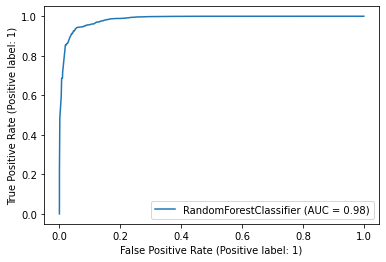

In [127]:
plot_roc_curve(Random_Forest, X_train_resample, Y_train_resample)
plt.show()

In [128]:
importance_df = pd.DataFrame({
    "Varname": X_train_Set.columns,
    "Imp": Random_Forest.feature_importances_
})

In [129]:
importance_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.768931
12,category_home,0.026853
7,category_food_dining,0.025635
8,category_gas_transport,0.023056
18,category_shopping_pos,0.022004
13,category_kids_pets,0.019097
2,city_pop,0.017133
17,category_shopping_net,0.016829
16,category_personal_care,0.016003
19,category_travel,0.011244


### Predicting on train set

In [130]:
Y_train_predict = Random_Forest.predict(X_train_resample)
Y_train_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(Y_train_resample, Y_train_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94   1289169
           1       0.93      0.95      0.94   1288749

    accuracy                           0.94   2577918
   macro avg       0.94      0.94      0.94   2577918
weighted avg       0.94      0.94      0.94   2577918



### Predicting on test set

In [132]:
Y_test_predict = Random_Forest.predict(X_test_Set)
Y_test_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [133]:
print(classification_report(Y_test_Set, Y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1289169
           1       0.07      0.94      0.13      7506

    accuracy                           0.93   1296675
   macro avg       0.53      0.93      0.55   1296675
weighted avg       0.99      0.93      0.96   1296675



### Testing model on original data without oversampling

In [134]:
Y_train_predict = Random_Forest.predict(X_train_Set)
Y_test_predict = Random_Forest.predict(X_test_Set)

print(classification_report(Y_train_Set, Y_train_predict))
print(classification_report(Y_test_Set, Y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1289169
           1       0.07      0.94      0.13      7506

    accuracy                           0.93   1296675
   macro avg       0.53      0.93      0.55   1296675
weighted avg       0.99      0.93      0.96   1296675

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1289169
           1       0.07      0.94      0.13      7506

    accuracy                           0.93   1296675
   macro avg       0.53      0.93      0.55   1296675
weighted avg       0.99      0.93      0.96   1296675



In [135]:
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
dtype: int64

In [136]:
df_train.shape

(1296675, 23)

In [137]:
# Subset of df_train

df_train_subset = df_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_subset.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [138]:
# Creating dataframe of y_train_pred

df_train_predict = pd.DataFrame(Y_train_predict)
df_train_predict.head()

,0
0,0
1,0
2,0
3,0
4,0


In [139]:
# Merging the two dataframes

df_train_combined = pd.concat([df_train_subset, df_train_predict],axis=1)
df_train_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [140]:
# Renaming column

df_train_combined= df_train_combined.rename(columns={ 0 : 'is_fraud_predict'})
df_train_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_predict
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [141]:
df_train_combined.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [142]:
df_train_combined.groupby('is_fraud_predict')['is_fraud_predict'].count()

is_fraud_predict
0    1196294
1     100381
Name: is_fraud_predict, dtype: int64

In [143]:
# Subset of df_test

df_train_subset = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_subset.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [144]:
# Creating dataframe of y_test_pred

df_test_predict = pd.DataFrame(Y_test_predict)
df_test_predict.head()

,0
0,0
1,0
2,0
3,0
4,0


In [145]:
 # Merging the two dataframes

df_test_combined = pd.concat([df_train_subset, df_test_predict],axis=1)
df_test_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0.0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0.0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0.0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0.0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0.0,0


In [146]:
# Renaming column

df_test_combined= df_test_combined.rename(columns={ 0 : 'is_fraud_predict'})
df_test_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_predict
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0.0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0.0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0.0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0.0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0.0,0


In [147]:
df_test_combined.groupby('is_fraud')['is_fraud'].count()

is_fraud
0.0    553574
1.0      2145
Name: is_fraud, dtype: int64

In [148]:
df_test_combined.groupby('is_fraud_predict')['is_fraud_predict'].count()

is_fraud_predict
0    1196294
1     100381
Name: is_fraud_predict, dtype: int64

In [149]:
# Merging train and test dataset for cost benefit analysis

df_final_combined = pd.concat([df_train_combined, df_test_combined],axis=0)
df_final_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_predict
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0


In [150]:
df_final_combined.shape

(2593350, 5)

# Cost Benefit Analysis

In [151]:
# Creating month and year columns

df_final_combined['month'] = pd.DatetimeIndex(df_final_combined['trans_date_trans_time']).month
df_final_combined['year'] = pd.DatetimeIndex(df_final_combined['trans_date_trans_time']).year
df_final_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_predict,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0,1.0,2019.0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0,1.0,2019.0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0,1.0,2019.0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0,1.0,2019.0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0,1.0,2019.0


In [152]:
# Group by variable creation

group = df_final_combined.groupby(["year","month"])

In [153]:
# Number of transactions per month

group.trans_num.count()

year    month
2019.0  1.0       52525
        2.0       49866
        3.0       70939
        4.0       68078
        5.0       72532
        6.0       86064
        7.0       86596
        8.0       87359
        9.0       70652
        10.0      68758
        11.0      70421
        12.0     141060
2020.0  1.0       52202
        2.0       47791
        3.0       72850
        4.0       66892
        5.0       74343
        6.0       87805
        7.0       85848
        8.0       88759
        9.0       69533
        10.0      69348
        11.0      72635
        12.0     139538
Name: trans_num, dtype: int64

In [154]:
# Average number of transactions per month

df_final_combined.trans_num.count()/24

77183.08333333333

In [155]:
# Average Number of fraudulent transactions per month

df_final_combined[df_final_combined['is_fraud']==1].trans_num.count()/24

402.125

In [156]:
# Average amount per fraud transaction

df_final_combined[df_final_combined['is_fraud']==1].amt.mean()

530.6614122888789

In [157]:
# Average number of transactions per month detected as fraud by the model

df_final_combined[df_final_combined['is_fraud_predict']==1].trans_num.count()/24

5987.833333333333

In [158]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_fraud_trans = df_final_combined.loc[(df_final_combined.is_fraud_predict==0) & (df_final_combined.is_fraud==1)]
Undetected_fraud_trans.trans_num.count()/24

101.25